# Module 4 - Algo Trading using Classification


   ### Welcome to the Answer notebook for Module 4 ! 
Make sure that you've submitted the module 3 notebook and unlocked Module 4 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('week3.csv')

data=data.dropna().reset_index(drop=True)
data

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,year,Day_Perc_Change,Trend,upper_bb,lower_bb,middle_bb
0,2017-06-01,LALPATHLAB,EQ,904.15,916.00,919.80,897.10,898.25,900.60,904.02,...,4930,71398,65.94,6,2017,-0.392634,Slight or No change,917.423230,887.269627,902.346429
1,2017-06-02,LALPATHLAB,EQ,900.60,907.90,912.00,886.95,907.00,903.75,898.44,...,11005,61235,59.23,6,2017,0.349767,Slight or No change,917.629966,887.512891,902.571429
2,2017-06-05,LALPATHLAB,EQ,903.75,910.40,911.55,897.00,906.55,904.50,905.14,...,5444,77489,81.09,6,2017,0.082988,Slight or No change,916.442131,887.779298,902.110714
3,2017-06-06,LALPATHLAB,EQ,904.50,917.00,917.00,899.80,905.50,904.65,904.38,...,4214,26259,69.76,6,2017,0.016584,Slight or No change,914.948337,888.265948,901.607143
4,2017-06-07,LALPATHLAB,EQ,904.65,901.95,916.80,898.45,915.00,914.90,912.86,...,2980,26762,68.78,6,2017,1.133035,Positive,916.513636,887.436364,901.975000
5,2017-06-08,LALPATHLAB,EQ,914.90,915.00,915.90,901.00,901.00,906.50,908.32,...,4803,67631,83.63,6,2017,-0.918133,Slight Negative,915.717626,887.696660,901.707143
6,2017-06-09,LALPATHLAB,EQ,906.50,910.00,913.55,891.00,898.55,898.95,898.91,...,3301,55713,71.55,6,2017,-0.832874,Slight Negative,914.180724,887.676418,900.928571
7,2017-06-12,LALPATHLAB,EQ,898.95,900.00,904.70,890.00,893.10,895.25,896.91,...,4250,21632,58.36,6,2017,-0.411591,Slight or No change,912.636031,890.413969,901.525000
8,2017-06-13,LALPATHLAB,EQ,895.25,902.95,912.25,895.10,905.20,907.15,909.20,...,5721,26407,65.78,6,2017,1.329238,Positive,913.159118,891.669453,902.414286
9,2017-06-14,LALPATHLAB,EQ,907.15,908.00,912.40,897.00,902.50,899.35,902.42,...,1713,29615,75.67,6,2017,-0.859836,Slight Negative,913.121979,891.863735,902.492857


### Query 4.1a 

Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [3]:
data['Call']=None

In [4]:

for row in range(len(data)):
    if(data['Close Price'].iloc[row]>data['upper_bb'].iloc[row]):
        data['Call'].iloc[row]='Short'
    if(data['Close Price'].iloc[row]<data['lower_bb'].iloc[row]):
        data['Call'].iloc[row]='Buy'
    if((data['Close Price'].iloc[row]<data['upper_bb'].iloc[row]) and (data['Close Price'].iloc[row]>data['middle_bb'].iloc[row])):
        data['Call'].iloc[row]='Hold Short/ Liquidate Buy'
    if((data['Close Price'].iloc[row]<data['middle_bb'].iloc[row]) and (data['Close Price'].iloc[row]>data['lower_bb'].iloc[row])):
        data['Call'].iloc[row]='Hold Buy/ Liquidate Short' 
data['Call'].fillna(method='ffill',inplace=True)

In [5]:
data

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Deliverable Qty,% Dly Qt to Traded Qty,Month,year,Day_Perc_Change,Trend,upper_bb,lower_bb,middle_bb,Call
0,2017-06-01,LALPATHLAB,EQ,904.15,916.00,919.80,897.10,898.25,900.60,904.02,...,71398,65.94,6,2017,-0.392634,Slight or No change,917.423230,887.269627,902.346429,Hold Buy/ Liquidate Short
1,2017-06-02,LALPATHLAB,EQ,900.60,907.90,912.00,886.95,907.00,903.75,898.44,...,61235,59.23,6,2017,0.349767,Slight or No change,917.629966,887.512891,902.571429,Hold Short/ Liquidate Buy
2,2017-06-05,LALPATHLAB,EQ,903.75,910.40,911.55,897.00,906.55,904.50,905.14,...,77489,81.09,6,2017,0.082988,Slight or No change,916.442131,887.779298,902.110714,Hold Short/ Liquidate Buy
3,2017-06-06,LALPATHLAB,EQ,904.50,917.00,917.00,899.80,905.50,904.65,904.38,...,26259,69.76,6,2017,0.016584,Slight or No change,914.948337,888.265948,901.607143,Hold Short/ Liquidate Buy
4,2017-06-07,LALPATHLAB,EQ,904.65,901.95,916.80,898.45,915.00,914.90,912.86,...,26762,68.78,6,2017,1.133035,Positive,916.513636,887.436364,901.975000,Hold Short/ Liquidate Buy
5,2017-06-08,LALPATHLAB,EQ,914.90,915.00,915.90,901.00,901.00,906.50,908.32,...,67631,83.63,6,2017,-0.918133,Slight Negative,915.717626,887.696660,901.707143,Hold Short/ Liquidate Buy
6,2017-06-09,LALPATHLAB,EQ,906.50,910.00,913.55,891.00,898.55,898.95,898.91,...,55713,71.55,6,2017,-0.832874,Slight Negative,914.180724,887.676418,900.928571,Hold Buy/ Liquidate Short
7,2017-06-12,LALPATHLAB,EQ,898.95,900.00,904.70,890.00,893.10,895.25,896.91,...,21632,58.36,6,2017,-0.411591,Slight or No change,912.636031,890.413969,901.525000,Hold Buy/ Liquidate Short
8,2017-06-13,LALPATHLAB,EQ,895.25,902.95,912.25,895.10,905.20,907.15,909.20,...,26407,65.78,6,2017,1.329238,Positive,913.159118,891.669453,902.414286,Hold Short/ Liquidate Buy
9,2017-06-14,LALPATHLAB,EQ,907.15,908.00,912.40,897.00,902.50,899.35,902.42,...,29615,75.67,6,2017,-0.859836,Slight Negative,913.121979,891.863735,902.492857,Hold Buy/ Liquidate Short


In [6]:
data['Call'].unique()

array(['Hold Buy/ Liquidate Short', 'Hold Short/ Liquidate Buy', 'Buy',
       'Short'], dtype=object)

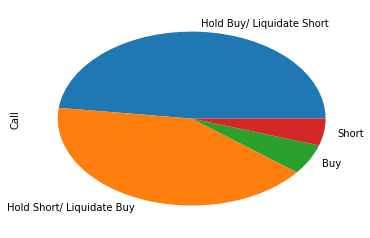

In [7]:
data['Call'].value_counts().plot(kind='pie')


Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)
Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [8]:
X=data[['middle_bb','lower_bb','upper_bb']]
y=data['Call']

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
y_pred=model.predict(X)


In [11]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y, y_pred))  
print(classification_report(y, y_pred))  

[[  5  19   3   0]
 [  4 181  46   0]
 [  3  34 162   0]
 [  0  12  11   1]]
                           precision    recall  f1-score   support

                      Buy       0.42      0.19      0.26        27
Hold Buy/ Liquidate Short       0.74      0.78      0.76       231
Hold Short/ Liquidate Buy       0.73      0.81      0.77       199
                    Short       1.00      0.04      0.08        24

              avg / total       0.73      0.73      0.70       481



In [12]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    pred_i = knn.predict(X)
    error.append(np.mean(pred_i != y))

Text(0,0.5,'Mean Error')

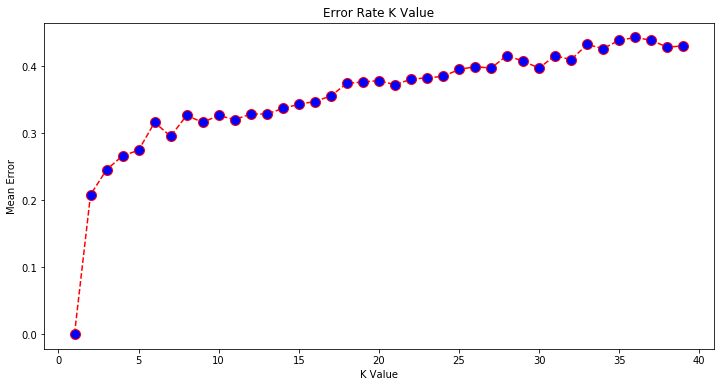

In [13]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [14]:
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.7255717255717256


Using KNN for k=3,we got 75% accuracy from our model.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB(priors=None)

In [17]:
y_prednb=gnb.predict(X_test)

In [18]:
print(metrics.accuracy_score(y_test,y_prednb))

0.5876288659793815


In [19]:
from sklearn import svm
Sc=svm.SVC(kernel='linear')
Sc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
y_predsv=Sc.predict(X_test)

In [21]:
print (metrics.accuracy_score(y_test,y_predsv))

0.5979381443298969


In [22]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=9, min_samples_leaf=6) 
clf_gini.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [23]:
y_predd1=clf_gini.predict(X_test)

In [24]:
metrics.accuracy_score(y_test,y_predd1)

0.5979381443298969

In [41]:
clf_ent = DecisionTreeClassifier(criterion = "entropy", 
            random_state = 100,max_depth=50, min_samples_leaf=5) 
clf_ent.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [26]:
y_predd2=clf_ent.predict(X_test)
metrics.accuracy_score(y_test,y_predd2)

0.4845360824742268

In [44]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(criterion='entropy', 
    max_depth=25, random_state=100)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [45]:
y_predd2=tree.predict(X_test)
metrics.accuracy_score(y_test,y_predd2)

0.4845360824742268

We got the best accuracy for KNN model.While all the other models gave an accuracy of around 50%,KNN for n=5 gave an accuracy of 75% approx.

**Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock**

In [46]:
test=pd.read_csv('AJANTPHARM.csv')
test=test.dropna().reset_index(drop=True)
test

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,AJANTPHARM,EQ,15-May-2017,1616.30,1610.00,1643.40,1601.00,1636.00,1633.50,1626.20,80998,1.317191e+08,8331,24643,30.42
1,AJANTPHARM,EQ,16-May-2017,1633.50,1632.50,1643.45,1610.00,1638.00,1634.25,1626.38,49236,8.007667e+07,4863,13831,28.09
2,AJANTPHARM,EQ,17-May-2017,1634.25,1620.50,1668.00,1620.50,1655.00,1654.35,1651.81,210648,3.479504e+08,12022,131496,62.42
3,AJANTPHARM,EQ,18-May-2017,1654.35,1640.25,1663.95,1621.85,1639.00,1633.40,1633.59,81511,1.331553e+08,5489,37544,46.06
4,AJANTPHARM,EQ,19-May-2017,1633.40,1640.00,1681.20,1621.50,1663.70,1670.25,1655.61,189657,3.139979e+08,8043,89768,47.33
5,AJANTPHARM,EQ,22-May-2017,1670.25,1670.00,1692.00,1648.00,1684.00,1677.95,1675.96,157923,2.646724e+08,7367,71708,45.41
6,AJANTPHARM,EQ,23-May-2017,1677.95,1687.80,1696.95,1619.00,1667.20,1676.80,1661.35,209386,3.478640e+08,9880,83637,39.94
7,AJANTPHARM,EQ,24-May-2017,1676.80,1672.00,1693.00,1623.30,1638.50,1657.45,1658.59,171228,2.839967e+08,8998,74108,43.28
8,AJANTPHARM,EQ,25-May-2017,1657.45,1650.00,1654.85,1578.05,1608.55,1616.15,1607.21,284830,4.577828e+08,18627,59249,20.80
9,AJANTPHARM,EQ,26-May-2017,1616.15,1615.00,1625.40,1569.15,1597.00,1602.15,1596.92,132760,2.120075e+08,8474,31926,24.05


In [47]:
middle_band = test['Close Price'].rolling(window=14).mean()
std = test['Close Price'].rolling(window=14).std()
upper_band = middle_band + 2* std
lower_band = middle_band - 2* std
test['upper_bb']=upper_band.dropna()
test['lower_bb']=lower_band.dropna()
test['middle_bb']=middle_band.dropna()

In [48]:
test=test.dropna().reset_index(drop=True)
test

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,upper_bb,lower_bb,middle_bb
0,AJANTPHARM,EQ,01-Jun-2017,1569.80,1569.00,1615.40,1560.00,1614.00,1606.40,1594.88,103525,1.651096e+08,5884,19501,18.84,1714.247419,1531.145438,1622.696429
1,AJANTPHARM,EQ,02-Jun-2017,1606.40,1629.00,1629.60,1589.00,1613.00,1607.55,1606.52,80491,1.293107e+08,4923,36389,45.21,1712.502334,1529.183380,1620.842857
2,AJANTPHARM,EQ,05-Jun-2017,1607.55,1613.00,1628.00,1595.00,1599.20,1604.40,1612.29,69627,1.122590e+08,3819,24092,34.60,1710.415451,1527.005978,1618.710714
3,AJANTPHARM,EQ,06-Jun-2017,1604.40,1618.00,1618.00,1571.65,1578.00,1580.85,1586.42,87333,1.385468e+08,6020,46635,53.40,1704.791248,1522.130180,1613.460714
4,AJANTPHARM,EQ,07-Jun-2017,1580.85,1580.85,1585.60,1558.00,1565.00,1562.90,1567.30,92425,1.448573e+08,6204,33196,35.92,1702.745091,1514.104909,1608.425000
5,AJANTPHARM,EQ,08-Jun-2017,1562.90,1577.00,1600.00,1557.00,1567.90,1569.10,1567.55,230227,3.608923e+08,5778,113411,49.26,1690.481275,1511.918725,1601.200000
6,AJANTPHARM,EQ,09-Jun-2017,1569.10,1572.00,1592.00,1558.25,1569.00,1570.55,1574.16,51592,8.121384e+07,3847,17048,33.04,1672.231858,1514.825285,1593.528571
7,AJANTPHARM,EQ,12-Jun-2017,1570.55,1560.00,1580.00,1549.50,1553.00,1559.50,1568.00,35636,5.587739e+07,2835,11798,33.11,1649.294500,1521.005500,1585.150000
8,AJANTPHARM,EQ,13-Jun-2017,1559.50,1557.00,1565.90,1541.00,1548.25,1544.75,1551.42,53727,8.335327e+07,3227,21455,39.93,1629.341495,1524.858505,1577.100000
9,AJANTPHARM,EQ,14-Jun-2017,1544.75,1545.00,1590.00,1521.75,1587.00,1585.85,1547.59,177659,2.749436e+08,8714,95950,54.01,1622.510424,1527.361005,1574.935714


In [49]:
X=test[['middle_bb','lower_bb','upper_bb']]
test['call']=Sc.predict(X)

In [50]:
test

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,upper_bb,lower_bb,middle_bb,call
0,AJANTPHARM,EQ,01-Jun-2017,1569.80,1569.00,1615.40,1560.00,1614.00,1606.40,1594.88,103525,1.651096e+08,5884,19501,18.84,1714.247419,1531.145438,1622.696429,Hold Short/ Liquidate Buy
1,AJANTPHARM,EQ,02-Jun-2017,1606.40,1629.00,1629.60,1589.00,1613.00,1607.55,1606.52,80491,1.293107e+08,4923,36389,45.21,1712.502334,1529.183380,1620.842857,Hold Short/ Liquidate Buy
2,AJANTPHARM,EQ,05-Jun-2017,1607.55,1613.00,1628.00,1595.00,1599.20,1604.40,1612.29,69627,1.122590e+08,3819,24092,34.60,1710.415451,1527.005978,1618.710714,Hold Short/ Liquidate Buy
3,AJANTPHARM,EQ,06-Jun-2017,1604.40,1618.00,1618.00,1571.65,1578.00,1580.85,1586.42,87333,1.385468e+08,6020,46635,53.40,1704.791248,1522.130180,1613.460714,Hold Short/ Liquidate Buy
4,AJANTPHARM,EQ,07-Jun-2017,1580.85,1580.85,1585.60,1558.00,1565.00,1562.90,1567.30,92425,1.448573e+08,6204,33196,35.92,1702.745091,1514.104909,1608.425000,Hold Short/ Liquidate Buy
5,AJANTPHARM,EQ,08-Jun-2017,1562.90,1577.00,1600.00,1557.00,1567.90,1569.10,1567.55,230227,3.608923e+08,5778,113411,49.26,1690.481275,1511.918725,1601.200000,Hold Short/ Liquidate Buy
6,AJANTPHARM,EQ,09-Jun-2017,1569.10,1572.00,1592.00,1558.25,1569.00,1570.55,1574.16,51592,8.121384e+07,3847,17048,33.04,1672.231858,1514.825285,1593.528571,Hold Short/ Liquidate Buy
7,AJANTPHARM,EQ,12-Jun-2017,1570.55,1560.00,1580.00,1549.50,1553.00,1559.50,1568.00,35636,5.587739e+07,2835,11798,33.11,1649.294500,1521.005500,1585.150000,Hold Short/ Liquidate Buy
8,AJANTPHARM,EQ,13-Jun-2017,1559.50,1557.00,1565.90,1541.00,1548.25,1544.75,1551.42,53727,8.335327e+07,3227,21455,39.93,1629.341495,1524.858505,1577.100000,Hold Buy/ Liquidate Short
9,AJANTPHARM,EQ,14-Jun-2017,1544.75,1545.00,1590.00,1521.75,1587.00,1585.85,1547.59,177659,2.749436e+08,8714,95950,54.01,1622.510424,1527.361005,1574.935714,Hold Buy/ Liquidate Short


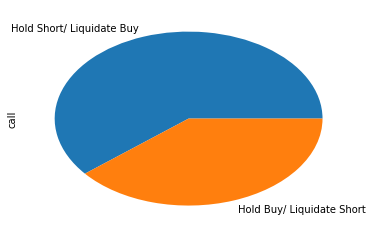

In [51]:
test['call'].value_counts().plot(kind='pie')

In [54]:

X=test[['middle_bb','lower_bb','upper_bb']]
test['call']=tree.predict(X)

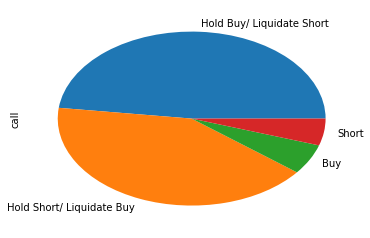

In [55]:
test['call'].value_counts().plot(kind='pie')

# Query 4.2

    Import the stock data file of your choice
    
    Define 4 new columns , whose values are:
    % change between Open and Close price for the day
    % change between Low and High price for the day
    5 day rolling mean of the day to day % change in Close Price
    5 day rolling std of the day to day % change in Close Price
    
    Create a new column 'Action' whose values are:
    1 if next day's price(Close) is greater than present day's.
    (-1) if next day's price(Close) is less than present day's.
    i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]
    i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]
    
    Construct a classification model with the 4 new inputs and 'Action' as target
    
     Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model


In [79]:
new=pd.read_csv('RELINFRA.csv')

In [80]:
new

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELINFRA,EQ,15-May-2017,609.50,606.80,609.35,600.30,604.95,605.40,605.23,1437325,8.699165e+08,25522,272876,18.98
1,RELINFRA,EQ,16-May-2017,605.40,606.00,614.20,601.00,609.80,611.05,609.49,1934562,1.179087e+09,30765,400984,20.73
2,RELINFRA,EQ,17-May-2017,611.05,607.00,614.20,603.50,605.05,605.25,608.28,1504208,9.149785e+08,35758,256693,17.06
3,RELINFRA,EQ,18-May-2017,605.25,597.70,601.85,576.15,576.45,578.65,588.48,1963168,1.155279e+09,37708,390203,19.88
4,RELINFRA,EQ,19-May-2017,578.65,578.70,586.35,567.40,571.00,569.55,575.27,1795870,1.033103e+09,35619,306193,17.05
5,RELINFRA,EQ,22-May-2017,569.55,572.00,575.00,552.75,556.00,555.25,562.68,1392634,7.836018e+08,29319,185983,13.35
6,RELINFRA,EQ,23-May-2017,555.25,550.10,553.50,522.40,522.40,526.25,532.82,3179920,1.694311e+09,56756,600676,18.89
7,RELINFRA,EQ,24-May-2017,526.25,526.00,529.70,479.20,492.00,493.70,503.49,4611031,2.321606e+09,74734,520320,11.28
8,RELINFRA,EQ,25-May-2017,493.70,495.75,502.85,488.55,495.85,497.15,496.53,2976503,1.477937e+09,40255,685204,23.02
9,RELINFRA,EQ,26-May-2017,497.15,496.15,513.95,496.05,508.20,508.50,508.09,2344838,1.191396e+09,33768,547816,23.36


In [81]:
new['oc_pct']=((new['Open Price']-new['Close Price'])/new['Open Price'])*100
new['lp_pct']=((new['Low Price']-new['High Price'])/new['Low Price'])*100
new['day5_rollmean']=(new['Close Price'].pct_change()*100).rolling(5).mean()
new['day5_rollstd']=(new['Close Price'].pct_change()*100).rolling(5).std()

In [82]:
new=new.dropna().reset_index(drop=True)
new

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,oc_pct,lp_pct,day5_rollmean,day5_rollstd
0,RELINFRA,EQ,22-May-2017,569.55,572.00,575.00,552.75,556.00,555.25,562.68,1392634,7.836018e+08,29319,185983,13.35,2.928322,-4.025328,-1.698835,1.964289
1,RELINFRA,EQ,23-May-2017,555.25,550.10,553.50,522.40,522.40,526.25,532.82,3179920,1.694311e+09,56756,600676,18.89,4.335575,-5.953292,-2.930063,1.826540
2,RELINFRA,EQ,24-May-2017,526.25,526.00,529.70,479.20,492.00,493.70,503.49,4611031,2.321606e+09,74734,520320,11.28,6.140684,-10.538397,-3.977281,1.906186
3,RELINFRA,EQ,25-May-2017,493.70,495.75,502.85,488.55,495.85,497.15,496.53,2976503,1.477937e+09,40255,685204,23.02,-0.282400,-2.927029,-2.958544,2.785518
4,RELINFRA,EQ,26-May-2017,497.15,496.15,513.95,496.05,508.20,508.50,508.09,2344838,1.191396e+09,33768,547816,23.36,-2.489167,-3.608507,-2.187416,3.661162
5,RELINFRA,EQ,29-May-2017,508.50,506.00,506.00,445.60,454.30,451.95,466.94,5113595,2.387719e+09,88914,861145,16.84,10.681818,-13.554758,-3.909454,5.442718
6,RELINFRA,EQ,30-May-2017,451.95,453.95,470.80,436.20,463.10,462.00,459.37,4198597,1.928711e+09,65104,312264,7.44,-1.773323,-7.932141,-2.420140,5.985251
7,RELINFRA,EQ,31-May-2017,462.00,464.00,484.00,455.25,480.80,478.90,470.56,5799887,2.729195e+09,80462,1294401,22.32,-3.211207,-6.315211,-0.451484,6.055628
8,RELINFRA,EQ,01-Jun-2017,478.90,481.00,487.90,475.20,477.85,479.60,481.61,2584206,1.244575e+09,38796,227711,8.81,0.291060,-2.672559,-0.562011,6.034391
9,RELINFRA,EQ,02-Jun-2017,479.60,482.10,490.70,478.65,485.15,484.05,484.88,2517358,1.220604e+09,41140,511152,20.31,-0.404480,-2.517497,-0.833043,5.903680


In [87]:
new['Action']=None
for row in range(len(new)-1):
    if((new['Close Price'].iloc[row+1])>(new['Close Price'].iloc[row])):
        new['Action'].iloc[row]=1
    else:
        new['Action'].iloc[row]=-1

In [88]:
new['Action']

0        -1
1        -1
2         1
3         1
4        -1
5         1
6         1
7         1
8         1
9         1
10       -1
11        1
12       -1
13       -1
14       -1
15       -1
16        1
17        1
18        1
19        1
20       -1
21        1
22        1
23        1
24       -1
25        1
26       -1
27       -1
28        1
29       -1
       ... 
459       1
460       1
461       1
462       1
463      -1
464      -1
465       1
466      -1
467      -1
468       1
469      -1
470       1
471       1
472       1
473      -1
474      -1
475       1
476       1
477       1
478      -1
479      -1
480       1
481      -1
482      -1
483      -1
484      -1
485       1
486       1
487      -1
488    None
Name: Action, Length: 489, dtype: object

In [89]:
new=new.dropna().reset_index(drop=True)
new

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,oc_pct,lp_pct,day5_rollmean,day5_rollstd,Action
0,RELINFRA,EQ,22-May-2017,569.55,572.00,575.00,552.75,556.00,555.25,562.68,1392634,7.836018e+08,29319,185983,13.35,2.928322,-4.025328,-1.698835,1.964289,-1
1,RELINFRA,EQ,23-May-2017,555.25,550.10,553.50,522.40,522.40,526.25,532.82,3179920,1.694311e+09,56756,600676,18.89,4.335575,-5.953292,-2.930063,1.826540,-1
2,RELINFRA,EQ,24-May-2017,526.25,526.00,529.70,479.20,492.00,493.70,503.49,4611031,2.321606e+09,74734,520320,11.28,6.140684,-10.538397,-3.977281,1.906186,1
3,RELINFRA,EQ,25-May-2017,493.70,495.75,502.85,488.55,495.85,497.15,496.53,2976503,1.477937e+09,40255,685204,23.02,-0.282400,-2.927029,-2.958544,2.785518,1
4,RELINFRA,EQ,26-May-2017,497.15,496.15,513.95,496.05,508.20,508.50,508.09,2344838,1.191396e+09,33768,547816,23.36,-2.489167,-3.608507,-2.187416,3.661162,-1
5,RELINFRA,EQ,29-May-2017,508.50,506.00,506.00,445.60,454.30,451.95,466.94,5113595,2.387719e+09,88914,861145,16.84,10.681818,-13.554758,-3.909454,5.442718,1
6,RELINFRA,EQ,30-May-2017,451.95,453.95,470.80,436.20,463.10,462.00,459.37,4198597,1.928711e+09,65104,312264,7.44,-1.773323,-7.932141,-2.420140,5.985251,1
7,RELINFRA,EQ,31-May-2017,462.00,464.00,484.00,455.25,480.80,478.90,470.56,5799887,2.729195e+09,80462,1294401,22.32,-3.211207,-6.315211,-0.451484,6.055628,1
8,RELINFRA,EQ,01-Jun-2017,478.90,481.00,487.90,475.20,477.85,479.60,481.61,2584206,1.244575e+09,38796,227711,8.81,0.291060,-2.672559,-0.562011,6.034391,1
9,RELINFRA,EQ,02-Jun-2017,479.60,482.10,490.70,478.65,485.15,484.05,484.88,2517358,1.220604e+09,41140,511152,20.31,-0.404480,-2.517497,-0.833043,5.903680,1


In [94]:
X=new[['oc_pct','lp_pct','day5_rollmean','day5_rollstd']]
y=new['Action']
y=y.astype('int')

In [103]:

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X,y)

y_pred=clf.predict(X)

In [104]:
metrics.accuracy_score(y,y_pred)

1.0

In [112]:
new['Market Return']=((new['Close Price']/new['Close Price'].shift(1)))

Text(0,0.5,'Strategy Returns(%)')

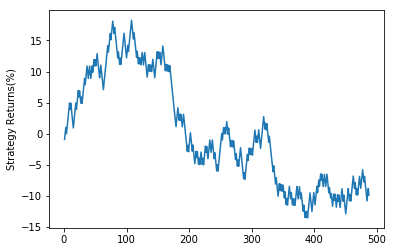

In [115]:
new['Strategy Return']=new['Market Return']*y_pred
ax=new['Strategy Return'].cumsum().plot()
ax.set_ylabel("Strategy Returns(%)")